In [52]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load the data
data = pd.read_csv('datapemilukpu.csv')

In [54]:
# Preprocess the data
# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
columns_to_encode = ['NAMA PARTAI POLITIK', 'JENIS KELAMIN', 'KECAMATAN', 'DAERAH PEMILIHAN', 'TERPILIH ATAU TIDAK']
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [55]:
# Select features and target
features = ['NAMA PARTAI POLITIK', 'JENIS KELAMIN', 'KECAMATAN', 'NO.URUT PARPOL',
            'SUARA SAH PARTAI', 'DAERAH PEMILIHAN', 'NO.URUT CALEG', 'SUARA SAH CALEG']
X = data[features]
y = data['TERPILIH ATAU TIDAK']


In [56]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent') # Change the strategy to 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [59]:
# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

In [60]:
# Scale the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print feature importances
feature_importance = pd.DataFrame({'feature': features, 'importance': clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        70
           1       0.64      0.47      0.54        15

    accuracy                           0.86        85
   macro avg       0.76      0.70      0.73        85
weighted avg       0.85      0.86      0.85        85


Feature Importances:
               feature  importance
7      SUARA SAH CALEG    0.770838
5     DAERAH PEMILIHAN    0.098444
6        NO.URUT CALEG    0.050341
2            KECAMATAN    0.047263
3       NO.URUT PARPOL    0.018618
0  NAMA PARTAI POLITIK    0.009463
4     SUARA SAH PARTAI    0.005034
1        JENIS KELAMIN    0.000000


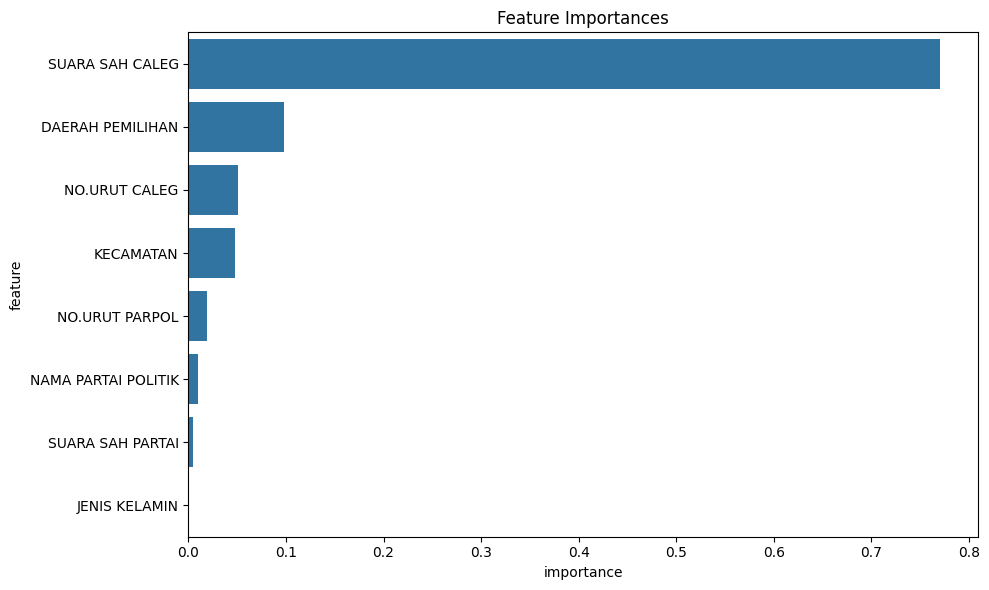

In [63]:
# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

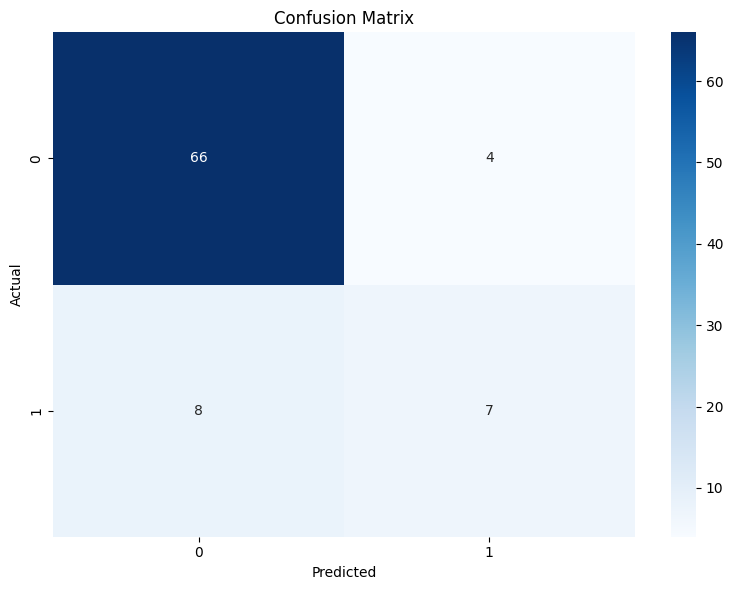

In [64]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

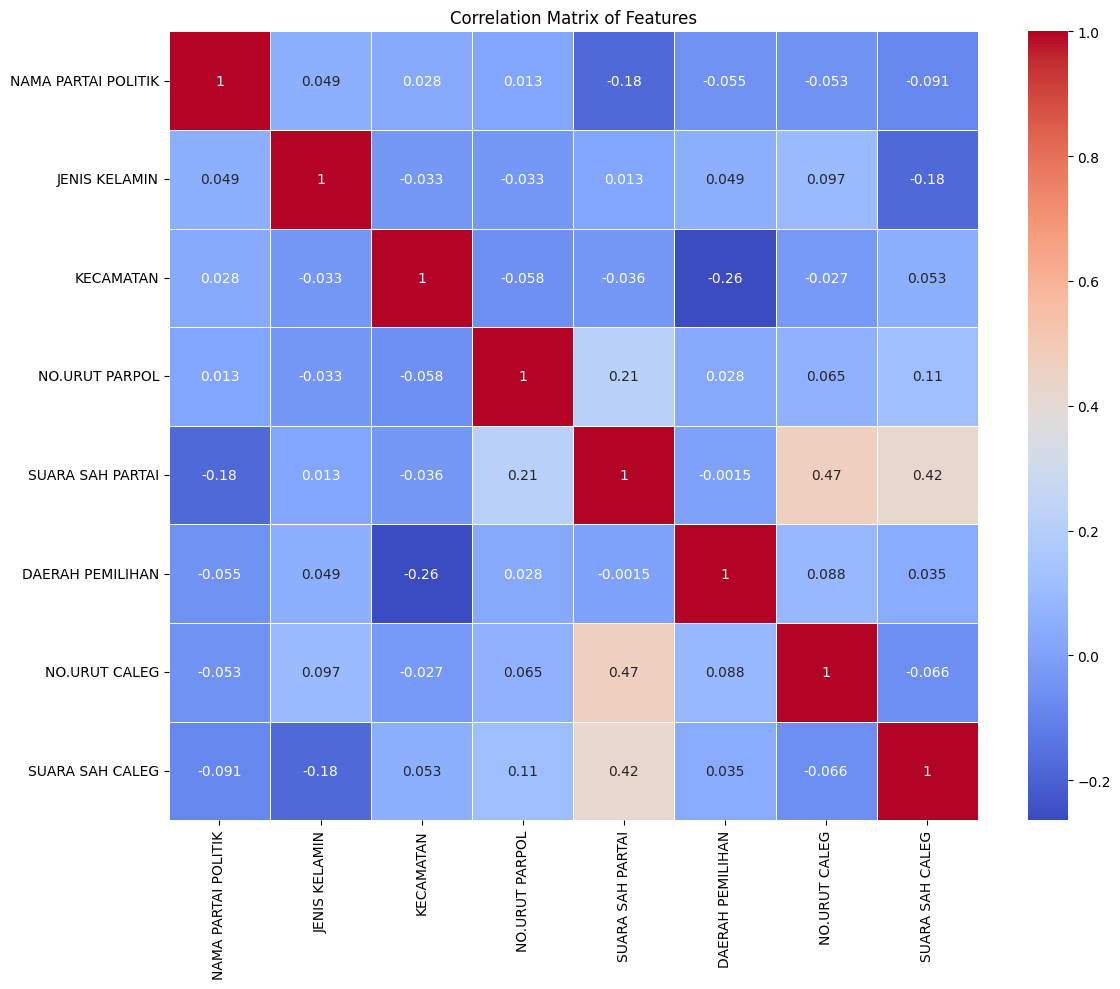

In [65]:
# Correlation matrix
correlation_matrix = X_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


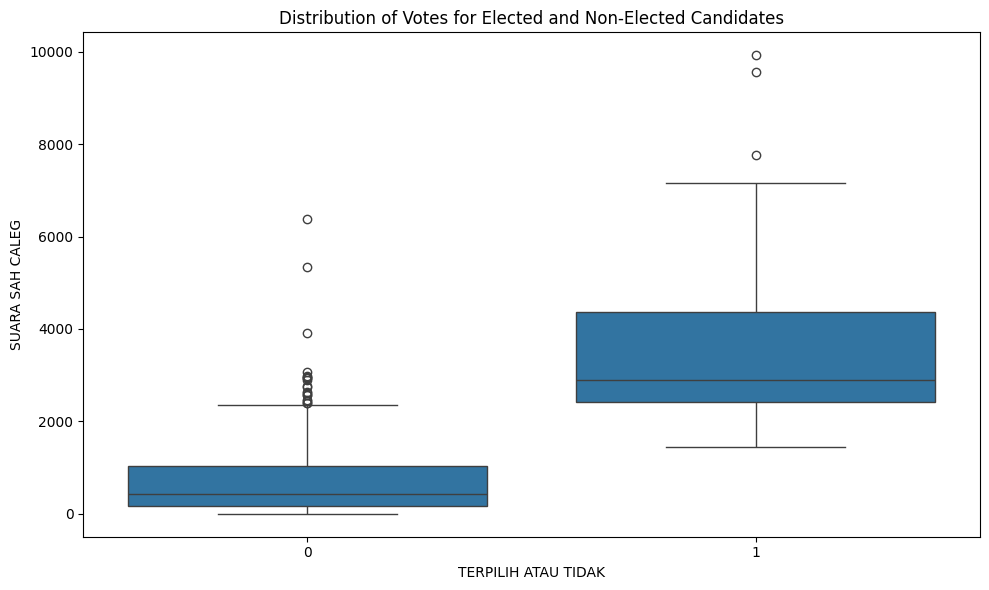

In [66]:
# Distribution of votes for elected and non-elected candidates
plt.figure(figsize=(10, 6))
sns.boxplot(x='TERPILIH ATAU TIDAK', y='SUARA SAH CALEG', data=data)
plt.title('Distribution of Votes for Elected and Non-Elected Candidates')
plt.tight_layout()
plt.show()

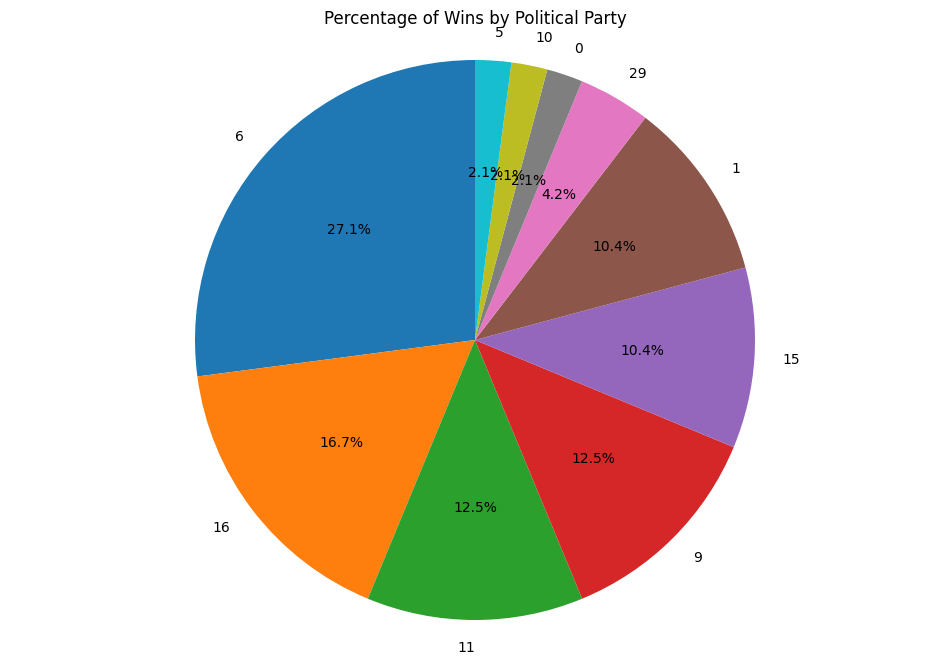


Percentage of Wins by Political Party:
6: 27.08%
16: 16.67%
11: 12.5%
9: 12.5%
15: 10.42%
1: 10.42%
29: 4.17%
0: 2.08%
10: 2.08%
5: 2.08%

Analysis complete. All visualizations have been displayed.


In [67]:
# Simpan mapping nama partai sebelum encoding
party_mapping = dict(enumerate(data['NAMA PARTAI POLITIK'].astype('category').cat.categories))

# Lanjutkan dengan preprocessing seperti sebelumnya
le = LabelEncoder()
columns_to_encode = ['NAMA PARTAI POLITIK', 'JENIS KELAMIN', 'KECAMATAN', 'DAERAH PEMILIHAN', 'TERPILIH ATAU TIDAK']
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

# ... (kode lainnya tetap sama)

# Di bagian akhir script, ganti kode visualisasi dengan yang berikut:

# Calculate and visualize party win percentages
party_wins = data[data['TERPILIH ATAU TIDAK'] == 1]['NAMA PARTAI POLITIK'].value_counts()
total_wins = party_wins.sum()
party_win_percentages = (party_wins / total_wins * 100).round(2)

# Convert encoded party names back to original names
party_win_percentages.index = party_win_percentages.index.map(party_mapping)

plt.figure(figsize=(12, 8))
plt.pie(party_win_percentages, labels=party_win_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Wins by Political Party')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

print("\nPercentage of Wins by Political Party:")
for party, percentage in party_win_percentages.items():
    print(f"{party}: {percentage}%")

print("\nAnalysis complete. All visualizations have been displayed.")